In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [88]:
# paths = [
#     "../results/bo/ackley53/*_iters.csv",
#      "../results/*dim53Ackley*_iters.csv"
# ]
paths = [
    "../results/*/*/*_iters.csv"
]
res = pd.concat(
    pd.read_csv(f) for p in paths for f in glob(p)
)
res.head()

,approach,problem,exp_id,iter_idx,iter_eval_time,iter_model_time,iter_fitness,iter_x,iter_best_fitness,iter_best_x
0,bayesianoptimization,"MixedFunction(name=dim53Ackley,log=False)",15978368000301185301,0,0.000112,0.007528,2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
1,bayesianoptimization,"MixedFunction(name=dim53Ackley,log=False)",15978368000301185301,1,0.000051,0.000422,2.876456,"[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
2,bayesianoptimization,"MixedFunction(name=dim53Ackley,log=False)",15978368000301185301,2,0.000045,0.000370,2.852907,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
3,bayesianoptimization,"MixedFunction(name=dim53Ackley,log=False)",15978368000301185301,3,0.000044,0.000377,2.895661,"[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
4,bayesianoptimization,"MixedFunction(name=dim53Ackley,log=False)",15978368000301185301,4,0.000045,0.000396,2.820102,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2.588236,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."


In [89]:
res['iter_total_time'] = res['iter_eval_time'] + res['iter_model_time']

In [90]:
resm = res.groupby(['approach', 'problem', 'iter_idx']).agg(
    iter_model_time_mean=pd.NamedAgg(column='iter_model_time', aggfunc=np.mean),
    iter_model_time_std=pd.NamedAgg(column='iter_model_time', aggfunc=np.std),
    iter_model_time_q05=pd.NamedAgg(column='iter_model_time', aggfunc=lambda x: np.quantile(x, 0.05)),
    iter_model_time_q95=pd.NamedAgg(column='iter_model_time', aggfunc=lambda x: np.quantile(x, 0.95)),
    iter_total_time_mean=pd.NamedAgg(column='iter_total_time', aggfunc=np.mean),
    iter_total_time_std=pd.NamedAgg(column='iter_total_time', aggfunc=np.std),
    iter_total_time_q05=pd.NamedAgg(column='iter_total_time', aggfunc=lambda x: np.quantile(x, 0.05)),
    iter_total_time_q95=pd.NamedAgg(column='iter_total_time', aggfunc=lambda x: np.quantile(x, 0.95)),
    iter_best_fitness_mean=pd.NamedAgg(column='iter_best_fitness', aggfunc=np.mean),
    iter_best_fitness_std=pd.NamedAgg(column='iter_best_fitness', aggfunc=np.std),
    iter_best_fitness_q05=pd.NamedAgg(column='iter_best_fitness', aggfunc=lambda x: np.quantile(x, 0.05)),
    iter_best_fitness_q95=pd.NamedAgg(column='iter_best_fitness', aggfunc=lambda x: np.quantile(x, 0.95)),
)
resm = resm.reset_index()
resm.head()

,approach,problem,iter_idx,iter_model_time_mean,iter_model_time_std,iter_model_time_q05,iter_model_time_q95,iter_total_time_mean,iter_total_time_std,iter_total_time_q05,iter_total_time_q95,iter_best_fitness_mean,iter_best_fitness_std,iter_best_fitness_q05,iter_best_fitness_q95
0,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",0,0.001416,0.000061,0.001356,0.001487,0.001458,0.000064,0.001398,0.001535,17.699835,8.321721,7.560485,34.224456
1,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",1,0.000193,0.000009,0.000185,0.000208,0.000221,0.000010,0.000212,0.000237,13.047627,5.960891,4.768369,24.841986
2,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",2,0.000178,0.000008,0.000173,0.000189,0.000205,0.000009,0.000199,0.000217,11.009020,4.643575,3.825054,17.534315
3,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",3,0.000175,0.000013,0.000168,0.000180,0.000201,0.000014,0.000194,0.000210,9.721019,3.666995,3.825054,16.350433
4,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",4,0.000172,0.000008,0.000166,0.000179,0.000198,0.000009,0.000191,0.000210,8.411284,3.144159,2.849597,13.845837


In [91]:
resm.head()

,approach,problem,iter_idx,iter_model_time_mean,iter_model_time_std,iter_model_time_q05,iter_model_time_q95,iter_total_time_mean,iter_total_time_std,iter_total_time_q05,iter_total_time_q95,iter_best_fitness_mean,iter_best_fitness_std,iter_best_fitness_q05,iter_best_fitness_q95
0,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",0,0.001416,0.000061,0.001356,0.001487,0.001458,0.000064,0.001398,0.001535,17.699835,8.321721,7.560485,34.224456
1,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",1,0.000193,0.000009,0.000185,0.000208,0.000221,0.000010,0.000212,0.000237,13.047627,5.960891,4.768369,24.841986
2,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",2,0.000178,0.000008,0.000173,0.000189,0.000205,0.000009,0.000199,0.000217,11.009020,4.643575,3.825054,17.534315
3,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",3,0.000175,0.000013,0.000168,0.000180,0.000201,0.000014,0.000194,0.000210,9.721019,3.666995,3.825054,16.350433
4,CoCaBO,"MixedFunction(name=dim10Rosenbrock,log=False)",4,0.000172,0.000008,0.000166,0.000179,0.000198,0.000009,0.000191,0.000210,8.411284,3.144159,2.849597,13.845837


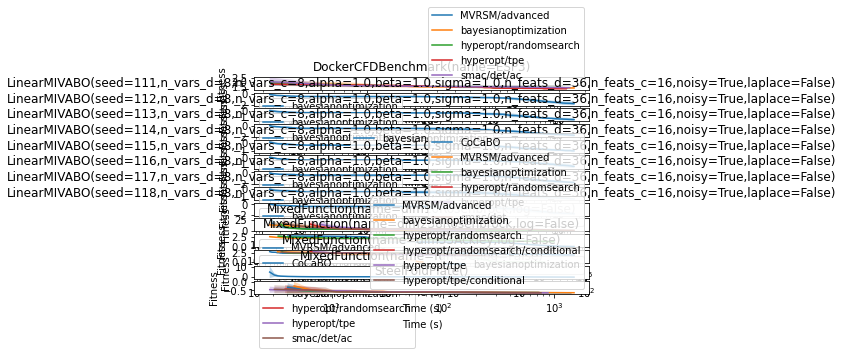

In [92]:
resps = resm.groupby('problem')


fig = plt.figure()
axs = fig.subplots(len(resps))
if type(axs) != np.ndarray:
    axs = [axs]

for (problem, respsi), ax in zip(resps, axs):
    

    ax.set_title(problem)
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylabel("Fitness")
    ax.set_xlabel("Time (s)")

    for (_, sr) in respsi.groupby('approach'):
        # x = np.cumsum(sr['iter_model_time_mean'])
        x = np.cumsum(sr['iter_total_time_mean'])
        y = sr['iter_best_fitness_mean']
        ax.plot(x, y, label=sr['approach'].iloc[0])

        # xstd = sr['iter_model_time_std']
        xstd = sr['iter_total_time_std']
        xmin = x - xstd
        xmax = x + xstd
        ystd = sr['iter_best_fitness_std']
        ymin = y - ystd
        ymax = y + ystd
        ax.fill_between(x, ymin, ymax, alpha=0.3)

    ax.legend()

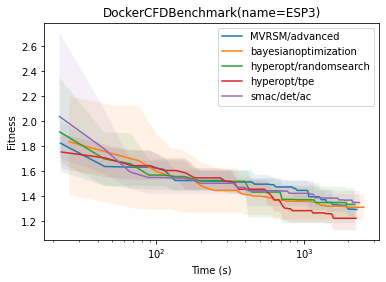

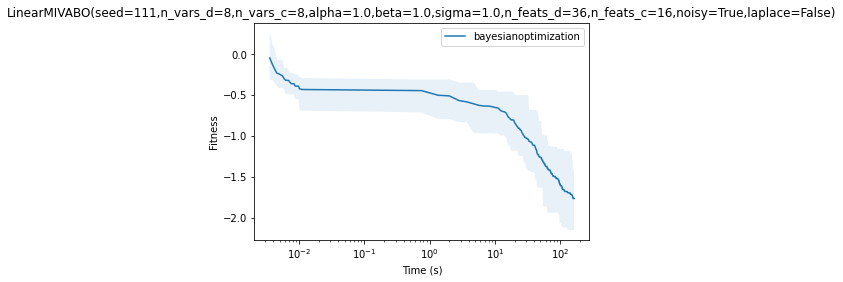

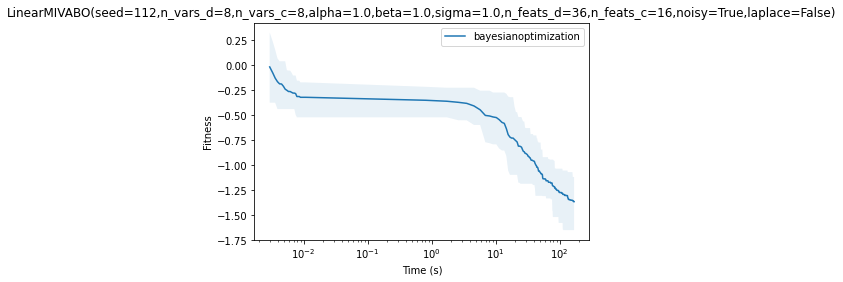

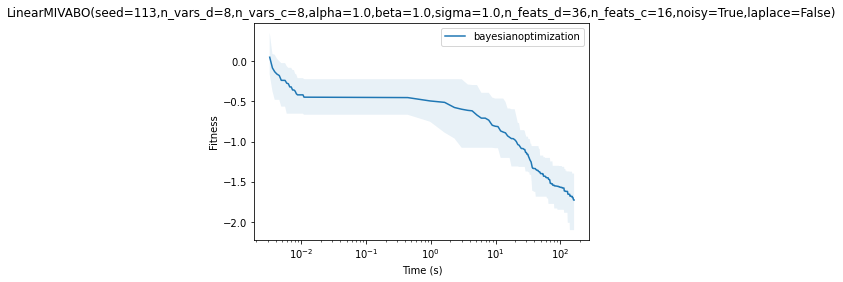

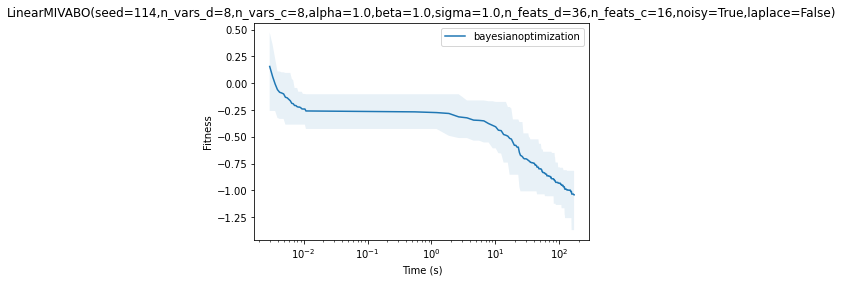

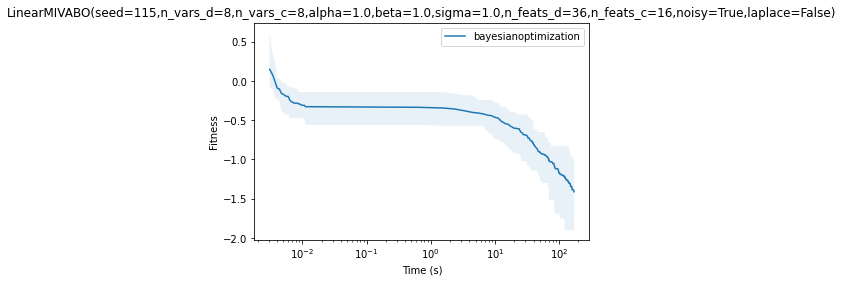

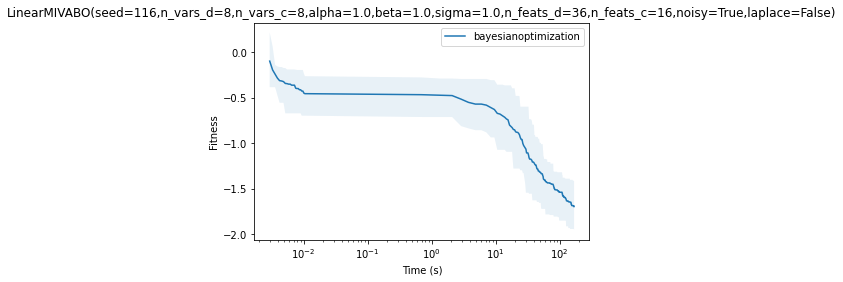

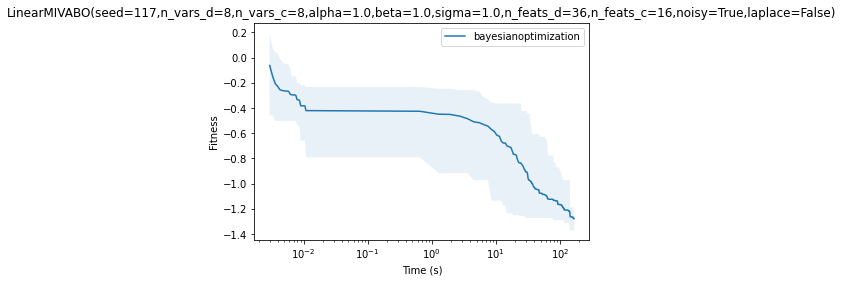

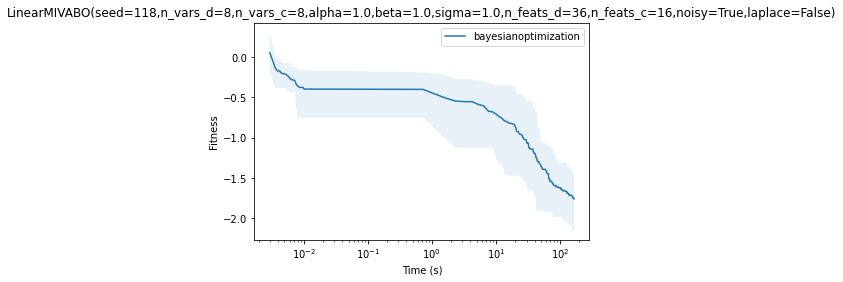

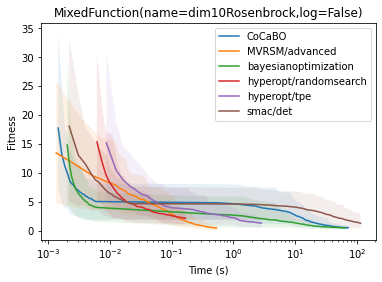

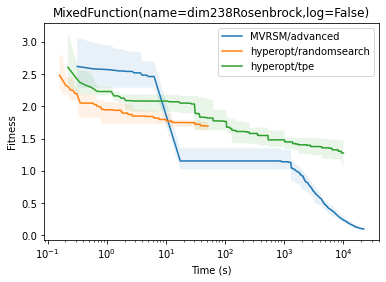

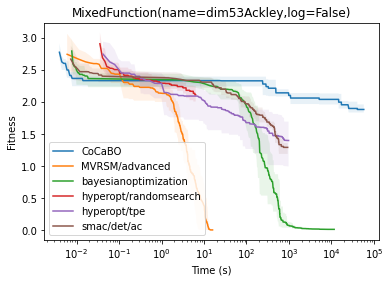

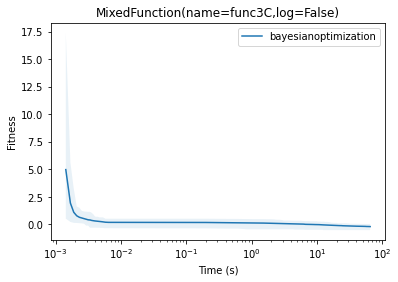

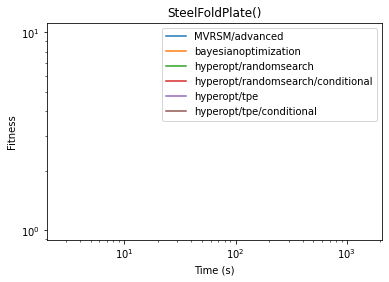

In [93]:
resps = resm.groupby('problem')
# margintype = 'std'
margintype = 'q5-95'

for problem, respsi in resps:
    fig = plt.figure()
    ax = fig.subplots()

    ax.set_title(problem)
    ax.set_xscale('log')
    if "SteelFoldPlate" in problem:
        ax.set_yscale('log')
    ax.set_ylabel("Fitness")
    ax.set_xlabel("Time (s)")

    for (_, sr) in respsi.groupby('approach'):
        # x = np.cumsum(sr['iter_model_time_mean'])
        x = np.cumsum(sr['iter_total_time_mean'])
        y = sr['iter_best_fitness_mean']
        if "SteelFoldPlate" in problem:
            y = y + 1.0
        ax.plot(x, y, label=sr['approach'].iloc[0])

        plot_margin = True
        # xstd = sr['iter_model_time_std']
        if margintype == 'std':
            # print("Plotting standard deviation")
            xstd = sr['iter_total_time_std']
            xmin = x - xstd
            xmax = x + xstd
            ystd = sr['iter_best_fitness_std']
            ymin = y - ystd
            ymax = y + ystd
        elif margintype == 'q5-95':
            # print("Plotting quantiles.")
            xmin = sr['iter_total_time_q05']
            xmax = sr['iter_total_time_q95']
            ymin = sr['iter_best_fitness_q05']
            ymax = sr['iter_best_fitness_q95']
        else:
            plot_margin = False

        if plot_margin:
            # print(f"Adding margin.\n{ymin}\n{ymax}")
            ax.fill_between(x, ymin, ymax, alpha=0.1)

    ax.legend()